# Some learning stuff

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
plt.style.use('seaborn')

Make some data first

In [4]:
from sklearn.datasets import make_blobs

In [76]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.7)

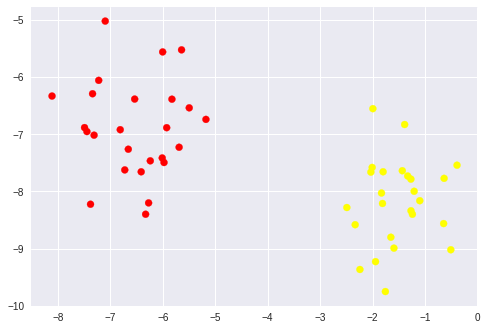

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

Fit a logistic regression

In [12]:
from sklearn.svm import SVC

In [29]:
svc = SVC(kernel='linear', C=1E10)

In [79]:
svc.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
def plot_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

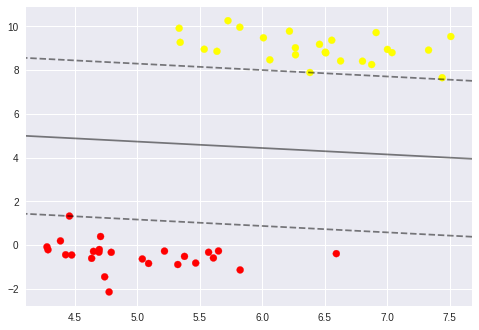

In [81]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plot_decision_function(svc, ax=ax)

Rewind, what did we do?

In [77]:
px = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 30)
py = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 30)
pY, pX = np.meshgrid(py, px)
xy = np.vstack([pX.ravel(), pY.ravel()]).T
P = svc.decision_function(xy).reshape(pX.shape)